# Assignment 04 Deep learning and backpropagation

## 复习上课内容以及复现课程代码

参考`Lecture-04.ipynb`

## 理论题目

### What does a nueron compute?

神经元的计算包括线性变换和非线性变化两部分。

线性变换：$z = wx + b$

非线性变换： $a = \sigma (z)$

### Why we use non-linear activation functions in neural networks?

如果没有非线性变换，深层的神经网络的效果以单层的神经网络的效果一样。

$$\hat{y} = W^{[1]}*W^{[2]} ... W^{[n]}*X + b = W*X + b$$

### What's is the Logistic Loss?

逻辑回归通过`sigmoid`的函数把$(-\infty, +\infty)$的数映射到$(0, 1)$区间上。逻辑回归常用二分类问题。

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

### Assume that you are building a binary classifier for dectecting if an image containing cats, which activation function would you recommend using for the output layer?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

### Why we don't use zero initialization for all parameters?

一层多个神经元的效果与一个神经元的效果是一样的。

### Can you implemented the softmax function using Python?

In [1]:
import numpy as np

In [2]:
def softmax(X):
    X = X - np.max(X)
    return np.exp(X) / np.sum(np.exp(X))

In [3]:
# softmax([1, 3, 4])

## 实践题

### Build a simple digits recognizer to check if the digit in the image is lager than 5?

#### **Package Dependencies**

In [4]:
%matplotlib inline

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Overview the datasets

In [6]:
digist_dataset = datasets.load_digits()

In [7]:
digist_dataset.data.shape, digist_dataset.target.shape

((1797, 64), (1797,))

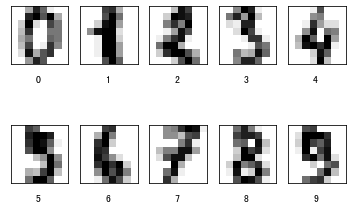

In [8]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digist_dataset.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digist_dataset.target[i-1]))
    plt.xticks([])
    plt.yticks([])

In [9]:
# split the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(digist_dataset.data, digist_dataset.target, test_size=0.25)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [11]:
# reform the label.
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

#### Architecture of Neural Network

**Mathematical expression of the algorithm**

$$z^{(i)} = W^T  * x^{(i)} + b$$

$$ \hat y^{(i)}=a^{(i)} = \sigma (z^{(i)})$$

$$L(y_i, \hat{y_i}) = -y_i*\log{\hat y_i} - (1-y_i)\log(1-\hat{y_i})$$

**The total cost over all training examples**

$$J = \frac{1}{m} \sum{L(y_i, \hat{y_i})}$$

#### Building the alogrithm

**1. Activation function**

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [12]:
def sigmoid(x:list):
    _sigmoid = lambda x: 1 / (1 + np.exp(-x))
    return list(map(_sigmoid, x))

In [13]:
# sigmoid(np.array([-1, 0, 1, 2]))

**2. Initialize Parameters**

In [14]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = np.random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [15]:
# initialize_parameters(10)

**3. Forward and Backward Propagation**

Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

$$J(y_i, \hat{y_i}) = -\frac{1}{m}\sum[y_i*\log{\hat y_i} + (1-y_i)\log(1-\hat{y_i})]$$

分析数据形状: $N$表示输入数据的维度，$M$表示样本的个数

* $X$ shape $(M, N)$
* $W$ shape $(N, 1)$
* $A = W.T * X$ shape $(M, 1)$
* $Y$ shape $(M, 1)$

In [16]:
from sklearn.metrics import log_loss

In [17]:
def propagate(w, b, X, Y):
    '''
    Forward and backward propagation.
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    def forward_propagation(W, b, X):
        """
        Forward Propagaion.
        """
        return sigmoid(np.dot(W.T, X) + b)

    def backward_propagation(A, Y, m):
        """
        Backward Propagation.
        """
        partial_w = np.dot(X, (A - Y).T) / m
        partial_b = np.sum([A - Y]) / m

        return partial_w, partial_b


    m = X.shape[1]

    # forward propagation.
    A = forward_propagation(w, b, X)
    cost = log_loss(Y[0], A[0])

    # backward propagation.
    dw, db = backward_propagation(A, Y, m)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {'dw':dw,
             'db':db}

    return grads, cost

**4. Optimization**

Minimizing the cost function using gradient descent.
$$ \theta = \theta - \alpha * d\theta$$
where the $\alpha$ is the learning rate.

In [18]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

**Training**

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [20]:
def clean_data():
    X_train, X_test, y_train, y_test = train_test_split(digist_dataset.data,
                                                        digist_dataset.target, test_size=0.25)
    y_train[y_train < 5] = 0
    y_train[y_train >= 5] = 1
    y_test[y_test < 5] = 0
    y_test[y_test >= 5] = 1

    return X_train, X_test, y_train, y_test

In [21]:
# X_train, X_test, Y_train, Y_test = clean_data()

# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# print(Y_train[Y_train == 0].shape, Y_train[Y_train == 1].shape)
# print(Y_test[Y_test == 0].shape, Y_test[Y_test == 1].shape)

In [22]:
def train(num_iterations=10000, learning_rate=1e-3):
    # dataset
    X_train, X_test, Y_train, Y_test = clean_data()

    # initialize parameters.
    X = X_train.T
    Y = Y_train.reshape(1, -1)
    N = X.shape[0]
    w, b = initialize_parameters(N)

    params, grads, costs = optimize(w, b, X, Y, num_iterations=num_iterations,
                                    learning_rate=learning_rate, print_cost=False)

    return params, grads, costs

In [23]:
params, grads, costs = train()

In [24]:
# params['w'].shape, params['b']

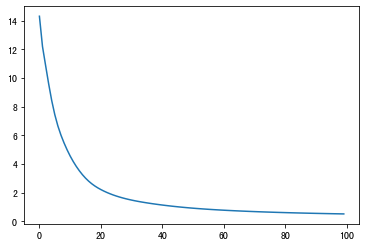

In [25]:
plt.plot(np.arange(len(costs)), costs)

**5. Predict**

Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [26]:
def predict(w, b, X, threshold=.5):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)

    A = sigmoid(np.dot(w.T, X) + b)
    A = A[0]
    
    A[A < threshold] = 0
    A[A > threshold] = 1

    Y_prediction = A.reshape(1, -1)

    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [27]:
X_train, X_test, Y_train, Y_test = clean_data()

In [28]:
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [29]:
# w = params['w']
# b = params['b']
# X = X_test.T

# Y_predict = predict(w, b, X)

In [30]:
# Y_predict

**5. Merge functions into a model**

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # initialize parameters.
    X = X_train.T
    Y = Y_train.reshape(1, -1)

    N = X.shape[0]
    w, b = initialize_parameters(N)

    # train
    params, grads, costs = optimize(w, b, X, Y, num_iterations=num_iterations,
                                    learning_rate=learning_rate, print_cost=print_cost)

    # predict
    best_w = params['w']
    best_b = params['b']
    Y_predict = predict(best_w, best_b, X_test.T)
    test_accuracy = accuracy_score(Y_test, Y_predict[0])

    ret = {
        'w': best_w,
        'b': best_b,
        'test_accuracy': test_accuracy,
        'costs': costs,
    }

    return ret

In [33]:
X_train, X_test, Y_train, Y_test = clean_data()

result = model(X_train, Y_train, X_test, Y_test, num_iterations=10000, learning_rate=1e-3, print_cost=False)

In [34]:
result['test_accuracy']

0.8444444444444444

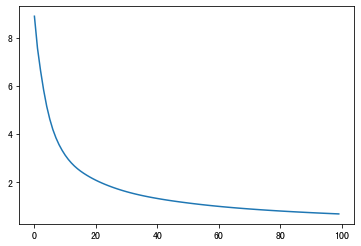

In [35]:
plt.plot(np.arange(len(result['costs'])), result['costs'])

## 选做题

### Observe the effect of learning rate on the learning process

tips: plot the learning curve with different learning rate.

TODO

### Observe the effect of iteration_num on the test accuracy.

TODO

## Challenge

Try use softmax function to build a model to recognize which digits is the image?

TODO